In [122]:
import scrapy
from scrapy.selector import Selector
import requests

In [123]:
url = "http://www.hanban.edu.cn/hanbancn/template/ciotab_cn1.htm"

In [124]:
response = requests.get(url=url)

In [125]:
response.encoding

'ISO-8859-1'

In [126]:
html0 = response.content.decode("utf8")

In [127]:
sel0 = Selector(text=html0)

In [128]:
college_urls = sel0.xpath("//div[@class='tcon_nation']//a[@target='_blank']/@href").extract()

In [129]:
responses = []
for i,url in enumerate(college_urls):
    responses.append(requests.get(url))
    print("\ri = {}/{}           ".format(i+1, len(college_urls)), end="")

i = 743/743           

In [145]:
times = []
for i,r in enumerate(responses):
    sel = Selector(text=r.content.decode('utf8'))
    t = sel.xpath("//div[@class='main_leftCon']//p[3]/span/text()").extract()
    if len(t) >= 1:
        times.append((i,t[0]))
    else:
        try:
            t = sel.xpath("//div[@class='main_leftCon']//p[3]/text()").extract()
            times.append((i,t[-1][7:]))
        except IndexError:
            print(i,sel.xpath("//div[@class='main_leftCon']//p[3]//span/text()").extract())

62 []
158 []
231 ['\u3000\u3000时间', '\xa0启动运行时间：2008年4月29日']
294 ['\u3000\u3000时间', '启动运行时间：2009年5月27日']


In [152]:
len(college_urls)

743

In [156]:
times_v1 = [(i,t) for i,t in times if '2' in t ]

In [230]:
times_v2 = []
for i,t in times_v1:
    if t.find('年') > 0 and t.find('月') > 0:
        p_year = t.find('年')
        p_month = t.find('月')
    elif t.find('/') > 0:
        p_year = t.find('/')
        p_month = t[p_year+1:].find('/') + p_year+1
        if p_month < 0:
            continue
    elif t.find('.') > 0:
        p_year = t.find('.')
        p_month = t[p_year+1:].find('.') + p_year+1 
        if p_month < 0:
            continue
    else:
        continue
    year = '20' + t[p_year-2:p_year]
    month = t[p_year+1:p_month]
    times_v2.append((i,int(year),int(month)))
    

In [232]:
times_v2[:10]

[(0, 2008, 3),
 (1, 2009, 2),
 (2, 2007, 4),
 (3, 2013, 11),
 (6, 2008, 9),
 (8, 2009, 11),
 (9, 2006, 10),
 (10, 2009, 2),
 (11, 2015, 10),
 (12, 2009, 2)]

In [235]:
y0,m0 = 2002,1

In [239]:
times_v3 = [(i,(y-y0)*12+(m-m0)) for i,y,m in times_v2]
ts = [t for i,t in times_v3]

In [247]:
% matplotlib inline
import matplotlib.pyplot as plt

bins = list(range(min(ts),max(ts),5))

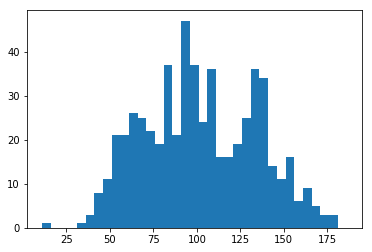

In [248]:
plt.hist(ts,bins=bins);
# plt.xticks()

In [257]:
tc = 100
yc,mc = tc//12 + 2002, tc%12 + 1

In [258]:
yc,mc

(2010, 5)

In [259]:
(2013-2002)*12

132

In [260]:
# youtube 12-15min